In [78]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
import pandas as pd

# **Part 1**

In [ ]:
#generate data
N = 10000
K = 3
mean = [0, 2]
vars = [0.4, 0.7]
pi = [0.4,0.6]

x = []
class0 = []
class1 = []
#class2 = []
for i in range(0,N):
  a = np.random.uniform(0,1,1)
  if a <= pi[0]:
    x.append(np.random.normal(mean[0],np.sqrt(vars[0]),1)[0])
    class0.append(np.random.normal(mean[0],np.sqrt(vars[0]),1)[0])
  elif a > pi[0]:
    x.append(np.random.normal(mean[1],np.sqrt(vars[1]),1)[0])
    class1.append(np.random.normal(mean[1],np.sqrt(vars[1]),1)[0])
  # elif a > (pi[0] + pi[1]):
  #   x.append(np.random.normal(mean[2],np.sqrt(vars[2]),1)[0])
  #   class2.append(np.random.normal(mean[2],np.sqrt(vars[2]),1)[0])

In [ ]:
class0_pdf = norm.pdf(class0,mean[0],np.sqrt(vars[0]))
class1_pdf = norm.pdf(class1,mean[1],np.sqrt(vars[1]))

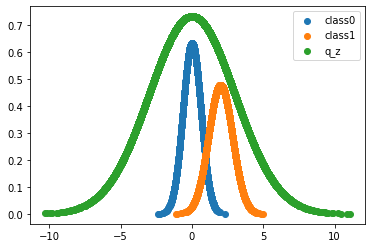

In [ ]:
q_z = np.random.normal(0, 3, 10000)
k = 5.5
q_z_pdf = norm.pdf(q_z,0,3)
q_z_pdf = k * q_z_pdf


plt.figure()
plt.scatter(class0,class0_pdf)
plt.scatter(class1,class1_pdf)
plt.scatter(q_z,q_z_pdf)
plt.legend(['class0', 'class1', 'q_z'])

In [ ]:
def AOR(mean,vars,z_0):
  #z_0 = np.random.normal(0, 3, 1)
  b = k*norm.pdf(z_0,0,3)

  u_0 = np.random.uniform(0,b,1)
  class0_check = norm.pdf(z_0,mean[0],np.sqrt(vars[0]))
  class1_check = norm.pdf(z_0,mean[1],np.sqrt(vars[1]))

  higher = 0

  if class0_check > class1_check:
    higher = 0
  else:
    higher = 1


  if u_0 < class0_check and u_0 < class1_check:
    if higher == 0:
      return 0
    else:
      return 1
  elif u_0 < class0_check: 
    return 0
  elif u_0 < class1_check: 
    return 1
  else:
    return -1

In [ ]:
class0_z = []
class1_z = []

for i in range(0, 1000):
  z_0 = np.random.normal(0, 3, 1)
  a = AOR(mean,vars,z_0)
  if a == 0:
    class0_z.append(z_0)
  elif a == 1:
    class1_z.append(z_0)

In [ ]:
z0_pdf = norm.pdf(class0_z,mean[0],np.sqrt(vars[0]))
z1_pdf = norm.pdf(class1_z,mean[1],np.sqrt(vars[1]))


In [ ]:
zs = class0_z + class1_z
zs_pdf = np.concatenate((z0_pdf,z1_pdf) ,axis=None)

In [ ]:
len(zs)

314

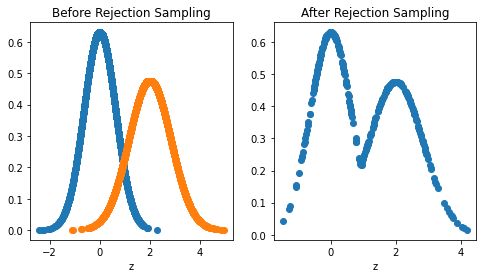

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.scatter(class0,class0_pdf)
plt.scatter(class1,class1_pdf)
plt.xlabel('z')
plt.title("Before Rejection Sampling")


plt.subplot(1, 2, 2)
plt.scatter(zs,zs_pdf)
plt.xlabel('z')
plt.title("After Rejection Sampling")

plt.show()

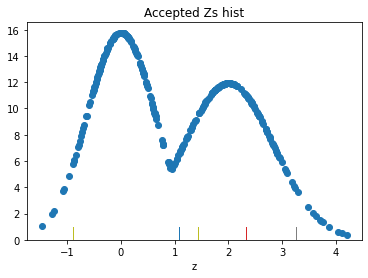

In [ ]:
plt.figure()
plt.hist(zs, bins=50)
plt.scatter(zs,25*zs_pdf)
plt.title('Accepted Zs hist')
plt.xlabel('z')
plt.show()

# **Part 2**

In [ ]:
from scipy.stats import norm
import random

Using function below uses equation 10.3 to return the liklihood

In [ ]:
def logliklihood(w, x, y, beta):
  prod = 1
  for i in range(0,len(x)):
    phi = [1,x[i]]
    phi = np.asmatrix(phi)
    prod *= norm.pdf(y[i],mean,np.sqrt(1/beta))
  return prod

The function below generates a weight point from a normal distribution based on an input mean

In [ ]:
def generateRandPoint(mean, scale):
  point = np.asmatrix([np.random.normal(mean[0][0],scale,1), np.random.normal(mean[0][1],scale,1)]).T
  return point

This function does the test based off the algorithm guidelines

In [ ]:
def test(mean, point, x, y, beta):
  #################### get liklihoods #############
  p_curr = logliklihood(mean,x,y,beta)
  
  p_next = logliklihood(point,x,y,beta)

  #################### check 1 ####################
  if (p_next > p_curr):
    return point
  else:
    u = np.random.uniform(0,1,1)
    #################### check 2 ##################
    if ((p_next/p_curr) > u):
      return point
    else:
      return mean

In [ ]:
#generate 25 points
beta = .2
w = [-0.3, 0.5]
sigma = .2
x = np.random.uniform(-1,1,25)
y = -0.3*np.ones(len(x)) + 0.5*np.array(x).T
y = y + np.random.normal(0,sigma,len(x))

scale = 0.2
current = np.zeros(2).reshape(1,2)
accepted = [current]

#iterate
for i in range(0,5000):
  temp = generateRandPoint(accepted[-1], scale)

  accepted_temp = test(accepted[-1], temp, x, y, beta)
  
  accepted_temp = np.array(accepted_temp)

  accepted.append(accepted_temp)
  
  if i % 1000 == 0:
    print(i)

0
1000
2000
3000
4000


In [ ]:
x_mean = np.mean([accepted[i][0][0] for i in range(len(accepted))]) 
y_mean = np.mean([accepted[i][0][1] for i in range(len(accepted))])
print("Actually weights: ", w ) 
print("Predicted weights: ", [x_mean, y_mean])

Actually weights:  [-0.3, 0.5]
Predicted weights:  [-0.35499156492732115, 0.49132333358358216]


as seen above the predictive weights are very close!

# Stretch Goal

Equations 3.58, 3.59, 5.3, 5.4 are coded below

In [155]:
def s_n(alpha, beta, phi):
  sn = ( alpha*np.eye(2) ) + (beta * (phi.T @ phi))
  return np.linalg.inv(sn)

In [156]:
def m_n(beta, s_n, phi, y):
  return beta * (s_n @ phi.T @ y) 

In [157]:
def sigma2_n(beta, s_n, phi_x):
  return (1/beta) + (phi_x.T @ s_n @ phi_x)

In [158]:
def likelihood_predictive(xcur,tcur,alpha,beta,x,y):
  phi = np.array([[1,x] for x in x])
  phi_x = np.array([1,xcur])
  
  sn = s_n(alpha, beta, phi)

  mn = m_n(beta, sn, phi, y)
  
  sigma = sigma2_n(beta, sn, phi_x)

  return norm.pdf(tcur, mn.T @ phi_x , sigma)

Data generated same way as before

In [159]:
beta = 25
alpha = 2
w = [-0.3, 0.5]
sigma = .2
x = np.random.uniform(-1,1,25)
y = -0.3*np.ones(len(x)) + 0.5*np.array(x).T
y = y + np.random.normal(0,sigma,len(x))

# all_points = []
# for i in range(0,1000):
#   mean = sample_mean(x)
#   all_points.append( getpoint(mean,np.var(x))[0] )


Testing to make sure likelihood function works

In [160]:
likelihood_predictive(0.64,0,alpha,beta,x,y)

8.646471175263677

Point generation function same as in part 2

In [190]:
def generateRandPoint2(mean, scale):
  point = [np.random.normal(mean[0],scale), np.random.normal(mean[1],scale)]
  return point

Walking funtion to get the accepted samples

In [200]:
def test_predictive(prev, cand, x, y, alpha, beta):

  #################### get liklihoods #############
  p_curr = likelihood_predictive(prev[0],prev[1],alpha,beta,x,y)
  
  p_next = likelihood_predictive(cand[0],cand[1],alpha,beta,x,y)

  #################### check 1 ####################
  if (p_next > p_curr):
    return cand
  else:
    u = np.random.uniform(0,1,1)
    #################### check 2 ##################
    if ((p_next/p_curr) > u):
      return cand
    else:
      return prev

10000 walks were done

In [203]:
scale = 0.2
current = [0,0]
accepted = [current]

#iterate
for i in range(0,10000):
  #print(i)
  temp = generateRandPoint2(accepted[-1], scale)

  accepted_temp = test_predictive(accepted[-1], temp, x, y, alpha, beta)
  #print("test pred:" , accepted_temp)
  accepted.append(accepted_temp)
  
  if i % 1000 == 0:
    print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [208]:
accepted_x = [i[0] for i in accepted]
accepted_y = [i[1] for i in accepted]

Graph below is a line

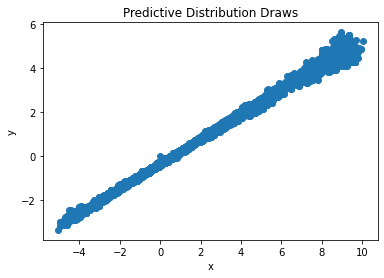

In [212]:
plt.figure()
plt.scatter(accepted_x, accepted_y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictive Distribution Draws')
plt.show()

wow looks good!